<a href="https://colab.research.google.com/github/NastiiaKoval/Koval_CDVS/blob/main/statistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Дані: https://www.kaggle.com/datasets/prachi13/customer-analytics

The data contains the following information:

ID: ID Number of Customers.
Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.

Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

Cost of the product: Cost of the Product in US Dollars.

Prior purchases: The Number of Prior Purchase.

Product importance: The company has categorized the product in the various parameter such as low, medium, high.

Gender: Male and Female.

Discount offered: Discount offered on that specific product.

Weight in gms: It is the weight in grams.

**Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.**

In [ ]:
import pandas as pd

In [ ]:
late_shipments = pd.read_csv("/content/late_shipments.csv")

In [ ]:
late_shipments

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,reached.on.time_y.n
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
late_shipments.columns = late_shipments.columns.str.lower()

In [ ]:
late_shipments = late_shipments.rename(columns={'reached.on.time_y.n':'is_late'})

In [ ]:
late_shipments

,id,warehouse_block,mode_of_shipment,customer_care_calls,customer_rating,cost_of_the_product,prior_purchases,product_importance,gender,discount_offered,weight_in_gms,is_late
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
!pip3 install pyarrow

In [ ]:
# Відкриття файлу .feather
late_shipments = pd.read_feather("/content/late_shipments.feather")

# Вивід перших декількох рядків для перевірки
late_shipments.head()


,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [ ]:
late_shipments.shape

(1000, 27)

#**Introduction to Statistics in Python**

#**Summary Statistics**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
food_consumption = pd.read_csv('/content/food_consumption.csv')

In [ ]:
world_happiness = pd.read_csv('/content/world_happiness.csv')

##Mean and median

Calculate the mean and median of kilograms of food consumed per person per year for both countries: USA and Belgium

In [ ]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country']=='Belgium']

# Filter for USA
usa_consumption = food_consumption[food_consumption['country']=='USA']

# Calculate mean and median consumption in Belgium
print('Belgium mean:', be_consumption['consumption'].mean())
print('Belgium median:', be_consumption['consumption'].median())

# Calculate mean and median consumption in USA
print('USA mean:', usa_consumption['consumption'].mean())
print('USA median:',usa_consumption['consumption'].median())

Belgium mean: 42.13272727272727
Belgium median: 12.59
USA mean: 44.650000000000006
USA median: 14.58


mean and median with agg() function

In [ ]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country']=='Belgium') | (food_consumption['country']=='USA')]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


##**Quartiles, quantiles, and quintiles**

In [ ]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [ ]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [ ]:
# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


##**Variance and standard deviation**

In [ ]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


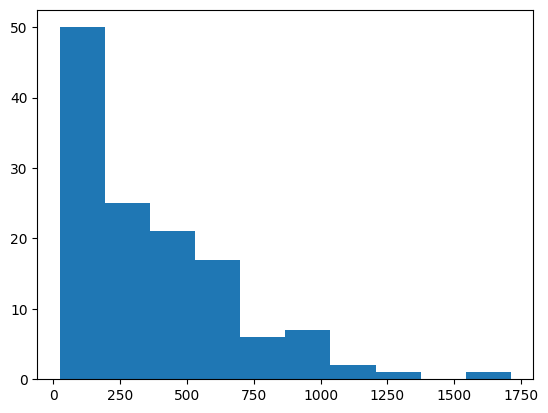

In [ ]:
# Create histogram of co2_emission for food_category 'beef'
plt.hist(x=food_consumption[food_consumption['food_category']=='beef']['co2_emission'])
# Show plot
plt.show()

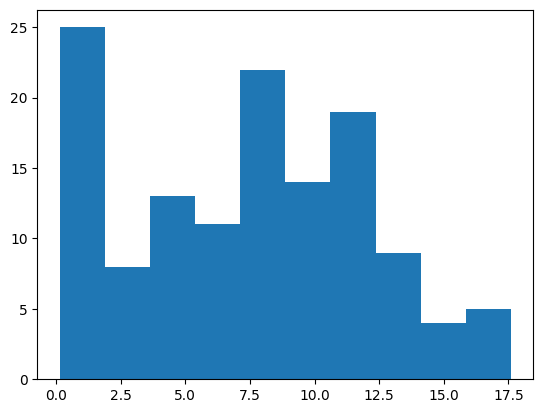

In [ ]:
# Create histogram of co2_emission for food_category 'eggs'
plt.hist(x=food_consumption[food_consumption['food_category']=='eggs']['co2_emission'])
# Show plot
plt.show()

##**Finding outliers using IQR**

In [ ]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print("Total co2_emission per country:\n", emissions_by_country)

Total co2_emission per country:
 country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [ ]:
# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print('Outliers by co2_emission per country', outliers)

Outliers by co2_emission per country country
Argentina    2172.4
Name: co2_emission, dtype: float64


#**Random Numbers and Probability**

##**Calculating probabilities**

You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

In [ ]:
amir_deals = pd.read_csv('/content/amir_deals.csv')

In [ ]:
# Count the deals for each product
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


In [ ]:
# Calculate probability of picking a deal with each product
probs = counts / sum(counts)
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


##**Sampling deals**

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

In [ ]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


##**Data back-ups**

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [ ]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

In [ ]:
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print(prob_less_than_5)

In [ ]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - (uniform.cdf(5, min_time, max_time))
print(prob_greater_than_5)

In [ ]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print(prob_between_10_and_20)

###Simulating wait times

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

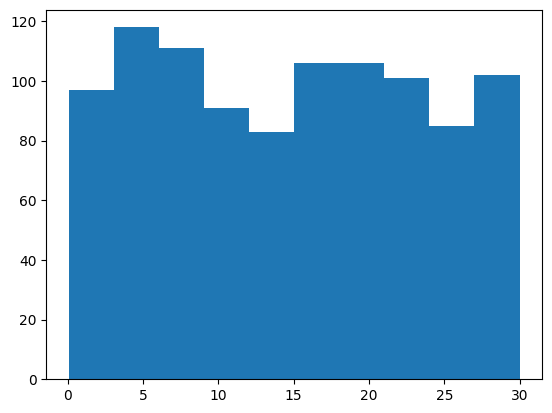

In [ ]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

##**Creating a probability distribution**


A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

In [ ]:
# Create a histogram of restaurant_groups and show plot
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()

In [ ]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / len(restaurant_groups)

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

print(size_dist)

In [ ]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]

# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Calculate expected value
expected_value = sum(size_dist['group_size'] * size_dist['prob'])
print(expected_value)

In [ ]:
# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size']>=4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = groups_4_or_more['prob'].sum()
print(prob_4_or_more)

##**Binomial distribution**

###Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [ ]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.

In [ ]:
# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

[1]


Simulate a typical week of Amir's deals, or one week of 3 deals.

In [ ]:
# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

[0]


Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
Print the mean number of deals he won per week.

In [ ]:
# Simulate 52 weeks of 3 deals
deals = binom.rvs(3 ,0.3, size=52)

# Print mean deals won per week
print(deals.mean())

0.8461538461538461


###Calculating binomial probabilities


Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.



What's the probability that Amir closes all 3 deals in a week?

In [ ]:
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.026999999999999996


What's the probability that Amir closes 1 or fewer deals in a week?

In [ ]:
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.784


What's the probability that Amir closes more than 1 deal?

In [ ]:
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21599999999999997


###How many sales will be won?

In [ ]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


#**More Distributions and the Central Limit Theorem**